In [8]:
import pandas

pilotTwoDF = pandas.read_csv("../../original-data/pilot2/responses.csv")

fileName = "../../original-data/pilot1/responses.csv"
responsesDF = pandas.read_csv(fileName)

converted = pandas.DataFrame(pilotTwoDF.columns)

#df.loc[0] = ['Alice', 25, 'Female']
#df.loc[1] = ['Bob', 30, 'Male']
#df.loc[2] = ['Charlie', 35, 'Male']

#responsesDF.iloc[:, 4:]

responsesDF.head()

,Timestamp,If you give your consent to take part please click 'I agree' below,Please enter your Prolific ID,What is your reading level of English?,List (up to) 5 words describing the author of this post:,List (up to) 5 words describing the author of this post:.1,List (up to) 5 words describing the author of this post:.2,List (up to) 5 words describing the author of this post:.3,List (up to) 5 words describing the author of this post:.4,List (up to) 5 words describing the author of this post:.5,List (up to) 5 words describing the author of this post:.6,List (up to) 5 words describing the author of this post:.7,List (up to) 5 words describing the author of this post:.8,List (up to) 5 words describing the author of this post:.9
0,2023/04/05 7:55:31 PM GMT+2,I agree,5e7e45b8f0320e0897cf5048,Fluent,"white, middle aged, male","upper class, white, middle aged, capitalist","old, upper class","adult, middle to lower class","adult, single, middle class","middle-aged, middle class, white man",Islamic,"middle to upper class, white man","middle aged, married","middle aged, middle class, single"
1,2023/04/05 7:58:25 PM GMT+2,I agree,5f16125c73920477380e8c00,Mother tongue,"American, middle aged, outspoken",Thinks their smarter than they are,"Traumatized, new atheist","Young, not well travelled","Physics enthusiast, educated",Male Karen,"Young, liberal, female","Young, male, conservative",Middle aged male,"Female, young, educated"
2,2023/04/05 7:59:11 PM GMT+2,I agree,6155841573df9e7e0d71a709,Fluent,Stupid insensitive repulsive disgusting rude,Insensitive inhuman unhappy confused impulsive,Fair truth eye-opening educational realistic,Honesty trustworthy educational realistic focu...,Dishonest sad optimistic risky unfaithful,Faithful honest truthful frowned amazed,Worried sad distracted distressed concerned,Trustworthy truthful realistic overwhelmed opt...,Unreasonable unfair rude unrealistic sad,Educating truthful fair opinionated good
3,2023/04/05 7:59:34 PM GMT+2,I agree,60fef19b9c12d84b5a87fa1d,Fluent,"man, young, opinionated, smart","man, capitalist, well-read, pessimist","thinker, philosopher, pessimist, sad","opinionated, man, young, optimist","driven, nerd, passionate, smart","opinionated, sports-man, hot headed","smart, philosopher, well-read","man, capitalist, army lover","smart, hot headed, angry, middle aged","empathetic, young, smart, well-read"
4,2023/04/05 8:00:39 PM GMT+2,I agree,61230876ad65890ff8619511,Fluent,"Young, middle-class, liberal","Middle-aged, conservative, white","Pessimistic, depressed, educated, curious","Liberal, upper-middle class, highly educated, ...","Middle class, science fan","Sensitive, logical, educated, well-spoken","Relegious, Muslim, educated","Arab, upper-middle class, well educated, male","Male, lower-middle class, middle-aged, white","Liberal, young, non-religious"


# Feature analysis

In [101]:
from collections import Counter

# removing unnecesary columns, clearing features a little bit
featuresDF = responsesDF.iloc[:, 4:].applymap(clearFeature)
allFeatures = featuresDF.stack()

# unique features
featureCounts = Counter(allFeatures)

# should be 1000 = 20 (annotators) x 10 (texts) x 5 (features)
print("All features:", len(allFeatures))
print("All unique features:", len(featureCounts))

print("Most common:")
featureCounts.most_common(10)

All features: 1000
All unique features: 570
Most common:


[('male', 22),
 ('skeptical', 16),
 ('opinionated', 12),
 ('open-minded', 11),
 ('confident', 11),
 ('curious', 11),
 ('young', 10),
 ('rational', 10),
 ('critical', 10),
 ('analytical', 8)]

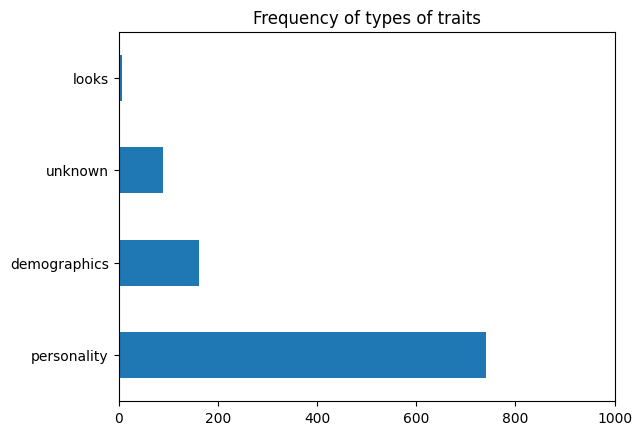

In [102]:
from analyze_features import readFeatureTypes
import matplotlib.pyplot as plt

featureTypes = readFeatureTypes("../../original-data/traits/types")
typesDF = featuresDF.applymap(lambda x : featureTypes[x])

typesCounts = typesDF.stack().value_counts()

# create a bar chart of the types
typesCounts.plot(kind='barh')

# set the axis labels and title
plt.xlim(0, len(featuresDF.stack()))
plt.title('Frequency of types of traits')
plt.show()

In [103]:
for featureType in typesCounts.keys():
    features = Counter({k: v for k, v in featureCounts.items() if featureTypes[k] == featureType})
    print(featureType, ": ", features.most_common(5))

personality :  [('skeptical', 16), ('opinionated', 12), ('open-minded', 11), ('confident', 11), ('curious', 11)]
demographics :  [('male', 22), ('young', 10), ('religious', 7), ('american', 7), ('educated', 6)]
unknown :  [('different', 3), ('no idea', 3), ('makes sense', 2), ('explanatory attribution', 2), ('colloquial', 2)]
looks :  [('dark', 4), ('dwarfish', 1), ('conventionally attractive', 1), ('fat', 1)]


Two zeros (unknown words?): 256


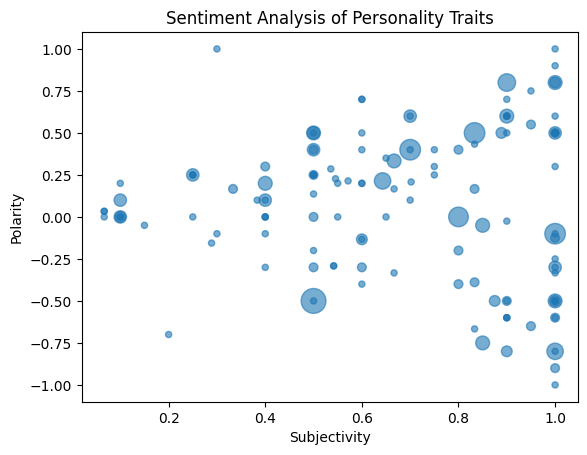

In [93]:
from textblob import TextBlob
import matplotlib.pyplot as plt

unknown = [ ]
words = [ ]
polarities = []
subjectivities = []
sizes = [ ]

personalityWords = Counter({k: v for k, v in featureCounts.items() if featureTypes[k] == "personality"})
for word, freq in personalityWords.items():
    blob = TextBlob("This person is " + word)

    if  blob.sentiment.polarity == 0 and blob.sentiment.subjectivity == 0:
        unknown.append(word)
        continue

    words.append(word)
    polarities.append(blob.sentiment.polarity)
    subjectivities.append(blob.sentiment.subjectivity)
    sizes.append(20 * freq)

#for i, word in enumerate(words):
#    if i % 5 == 0:
#        plt.annotate(word, xy=(subjectivities[i], polarities[i]), xytext=(5,5), textcoords='offset points')


print("Two zeros (unknown words?):", len(unknown))

plt.scatter(subjectivities, polarities, s=sizes, alpha=0.6)
plt.title("Sentiment Analysis of Personality Traits")
plt.xlabel("Subjectivity")
plt.ylabel("Polarity")
plt.show()

In [106]:
from analyze_features import generatePointsToPlot

def describe(anns):
    text = "I think that this person is " + ", ".join(anns)
    return text

allTexts = [ ]
for _, row in featuresDF.iterrows():
    anns = [ ]
    for index, elem in enumerate(row):
        if index % 5 == 0 and anns:
            allTexts.append(describe(anns))
            anns = [  ]
            
        anns.append(elem)

    allTexts.append(describe(anns))

print(allTexts)
#X, Y = generatePointsToPlot()

ImportError: cannot import name 'generatePointsToPlot' from 'analyze_features' (/Users/agnieszkafalenska/Remote/IMS/Root/mount/arbeitsdaten14/projekte/sfb-732/d8/falensaa/BiasInArguments/scripts/analyze/analyze_features.py)

In [97]:
from transformers import AutoTokenizer
from collections import defaultdict
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

def describeAndTokenize(anns):
    text = "I think that this person is " + ", ".join(anns)
    return tokenizer(text, return_tensors="pt", padding=True, truncation=True)

allTexts = defaultdict(lambda : [ ])
for annIndex, row in featuresDF.iterrows():
    annId = responsesDF.iloc[annIndex][2]
    anns = [ ]
    for index, elem in enumerate(row):
        if index % 5 == 0 and anns:
            allTexts[annId].append(describeAndTokenize(anns))
            anns = [  ]
            
        anns.append(elem)

    allTexts[annId].append(describeAndTokenize(anns))

In [37]:
from transformers import AutoModel

model = AutoModel.from_pretrained(model_ckpt).to(device)

hiddenStates = { }
for annId, allTokens in allTexts.items():
    hiddenStates[annId] = [ ]
    for tokens in allTokens:
        with torch.no_grad():
            inputs = {k:v.to(device) for k,v in tokens.items()}
            last_hidden_state = model(**inputs).last_hidden_state
            cls_token = last_hidden_state[:,0][0].numpy()
            hiddenStates[annId].append(cls_token) # -> NumPy array

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


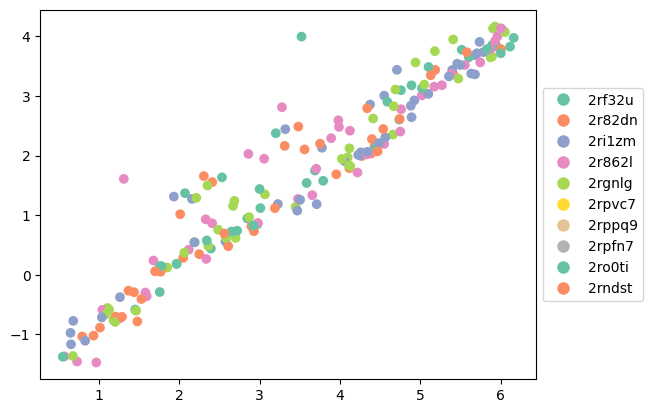

In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import umap
import itertools

def generateBertDataToPlot():
    data = [ ]
    annIds = [ ]

    for annId, states in hiddenStates.items():
        data += states

        for index, state in enumerate(states):
            annIds.append(lbls[index % 5])

    mapper = umap.UMAP(n_components=2, metric="cosine").fit(np.array(data))
    X = mapper.embedding_[:, 0]
    Y = mapper.embedding_[:, 1]   

    return X, Y, lbls, annIds

traitsX, traitsY, categories, labels = generateDataToPlot()

# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", len(categories))

# Map continents to the colors
color_map = dict(zip(categories, rgb_values))
colors = [ color_map[category] for category in labels ]

plt.scatter(X, Y, c = colors)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, 
                              markerfacecolor=color_map[category], markersize=10) for category in categories]

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# display the plot
plt.show()



# Annotator analysis

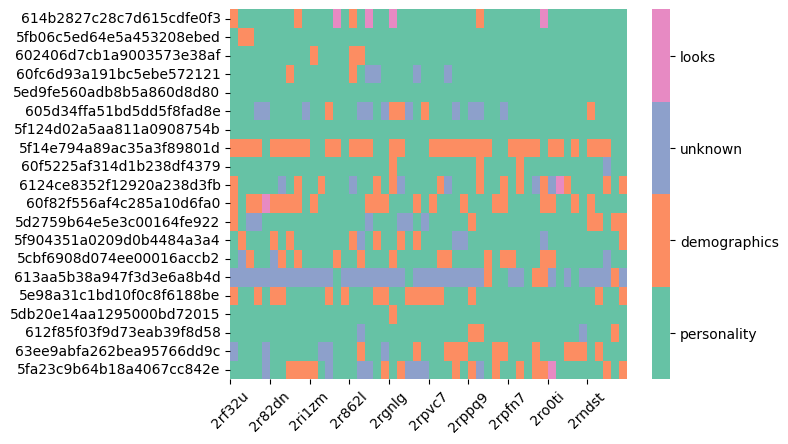

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

catsIds = { val:key for (key,val) in enumerate(typesCounts.keys()) }
intFeaturesDF = typesDF.applymap(lambda x : catsIds[x])

# create a heatmap of the DataFrame
ax = sns.heatmap(intFeaturesDF, cmap=sns.color_palette("Set2", len(catsIds)))

# fix the legend
colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / len(catsIds) + r * i / len(catsIds) for i in range(len(catsIds))])
colorbar.set_ticklabels(list(typesCounts.keys()))

# y labels
ax.set_yticklabels(responsesDF.iloc[:,2].values)
plt.yticks(rotation = 0)

# x labels
lbls = [ lbl.split("[")[1].strip()[:-1] for lbl in featuresDF.columns if "[" in lbl ]
plt.xticks(range(0, len(featuresDF.columns ), 5), rotation = 45)
ax.set_xticklabels(lbls)

# display the plot
plt.show()

In [ ]:
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = [ "test" ]

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()

In [60]:
from textblob import TextBlob

word = "xx"
blob = TextBlob(word)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print("Polarity:", polarity)
print("Subjectivity:", subjectivity)

Polarity: 0.0
Subjectivity: 0.0
